In [116]:
"""Calculating Spectroscopic Constants from a Potential Energy Surface"""

__authors__ = "Ashley Ringer McDonald"
__credits__ = ["Dominic A. Sirianni"]
__email__   = ["armcdona@calpoly.edu"]

__copyright__ = "(c) 2008-2019, The Psi4Education Developers"
__license__   = "BSD-3-Clause"
__date__      = "2019-11-18"

# Calculating Spectroscopic Constants from a Potential Energy Surface  
The spectroscopic constants for a diatomic molecule can be calculated from a series of potential energies computed for different bond separations.  In this lab, you will calculate the spectroscopic constants for two molecules and compare their force constants.  You will also study the effect of using the harmonic approximation in determining the vibrational energy levels.  

To use this lab: As you work through the lab, be sure to execute each code block.  If you don't, then when you try to write you own code, it will tell you the previous variable are undefined because the prior code blocks were not executed.

First we import the electronic structure functions into our notebook.  

In [117]:
import psi4
import numpy as np
import matplotlib.pyplot as plt
import sympy

Next contruct the molecule using the PSI4 input structure and define the values of the bond length, R.  Here we build an HF molecule.

In [118]:
mol_tmpl = """H
F 1 **R**"""
rvals = [0.8, 0.85, 0.9, 0.95, 1.0]

Each of the following `psi4.` functions calls uses the Psi4 program.  The `psi4.geometry` function creates the molecule and the `psi4.energy` function calculates the SCF/cc-pVDZ energy.

In [119]:
molecules =[]
energies = []
for r in rvals:
    molecule = psi4.geometry(mol_tmpl.replace("**R**", str(r)))
    molecules.append(molecule)
for mol in molecules:
    energy = psi4.energy("SCF/cc-pVDZ", molecule=mol)
    energies.append(energy)
print(rvals)
print(energies)

[0.8, 0.85, 0.9, 0.95, 1.0]
[-100.00264748472989, -100.01584984980659, -100.01969338232016, -100.01702310946796, -100.00985995181856]


This makes a nicer chart

In [120]:
for num, r in enumerate(rvals):
    print(r, ':', energies[num])

0.8 : -100.00264748472989
0.85 : -100.01584984980659
0.9 : -100.01969338232016
0.95 : -100.01702310946796
1.0 : -100.00985995181856


*What is the general trend in the energy for these bond distances? Offer an explaination as to why this seems reasonable.*

Student answer box: the energy decreases as the bond increases until it reaches minimum energy with the optimum bond length, then the energy starts to increase again 

Activity: *Plot the energies vs. R*

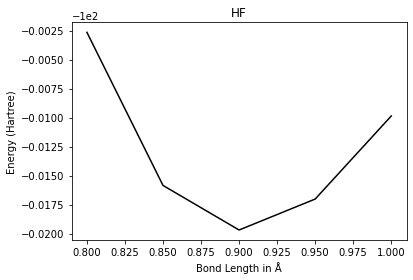

In [121]:
#Write you code here
plt.plot(rvals, energies, 'black')

plt.ylabel("Energy (Hartree)")
plt.xlabel("Bond Length in Å")
plt.title("HF")
plt.show()

The next function uses the bonds distances and the energies to derive the spectroscopic constants for the molecule.  These are output to a python dictionary which is called data in this example.  All of the values are given in cm$^{-1}$.

In [122]:
data = psi4.diatomic.anharmonicity(rvals, energies)

In [123]:
print(data)

{'re': 0.9014127115020593, 'r0': 0.909919977016546, 'we': 4440.843495395646, 'wexe': 95.78946466253993, 'nu': 4249.264566070566, 'E(re)': -100.01969593667276, 'ZPVE(harmonic)': 2220.421747697823, 'ZPVE(anharmonic)': 2196.474381532188, 'Be': 21.67764589105128, 'B0': 21.274191979772727, 'ae': 0.8069078225571094, 'De': 0.002066166940993677}


To access an element of data in a later computation, you use the syntax: 

In [124]:
data['nu']

4249.264566070566

Activity: *Calculate the energies of the n vibrational levels.  Recall that the vibrational energy levels are given by $$ E_n = \omega_e \left( n+ \frac{1}{2} \right)  - \omega_e x_e \left( n + \frac{1}{2} \right)^2   $$ where the second term is the anharmonic correction.  Assuming J=0, calculate the energy for the n=0 to n=3 energy levels, with and without the anharmonic correction.  Remember, you can access the $ \omega_e $ and $ \omega_e x_e $ values from the `data` dictionary.  Have your code print your values.*

In [125]:
#Write your code here
Ene = lambda n : data['we']*(n+1/2)
Corre = lambda n : data['wexe']*(n+1/2)**2
for n in range(0,4):
    print("The energy for n = %d without correction is: %.2f" %(n,Ene(n)))
    print("The energy for n = %d with anharmonic correction is: %.2f \n" %(n,Ene(n)-Corre(n)))

The energy for n = 0 without correction is: 2220.42
The energy for n = 0 with anharmonic correction is: 2196.47 

The energy for n = 1 without correction is: 6661.27
The energy for n = 1 with anharmonic correction is: 6445.74 

The energy for n = 2 without correction is: 11102.11
The energy for n = 2 with anharmonic correction is: 10503.42 

The energy for n = 3 without correction is: 15542.95
The energy for n = 3 with anharmonic correction is: 14369.53 



Activity: *Calculate the difference between the harmonic and the anharmonic energies and print these values.*

In [126]:
# Write your code here
for n in range(0,4):
    print("The difference between harmonic and anharmonic energy for n = %d is: %.2f" %(n,Ene(n)-(Ene(n)-Corre(n))))

The difference between harmonic and anharmonic energy for n = 0 is: 23.95
The difference between harmonic and anharmonic energy for n = 1 is: 215.53
The difference between harmonic and anharmonic energy for n = 2 is: 598.68
The difference between harmonic and anharmonic energy for n = 3 is: 1173.42


*Is it more important to include anharmonicity corrections for ground state energy calculations or excited state calculations? Explain your answer.*

Write your answer here:  it is only important for excited states since there is not much difference at ground state level

Activity: *Calculate the $ \Delta E $ for n=0 to n=1 and n=1 to n=2.  Compare the results for the harmonic approximation and the anharmonic results.*

In [127]:
# Write you code here
for n in range(0,2):
    print("Delta E between n = %d and %d is: %.2f for harmonic, and %.2f for anharmonic" %(n,n+1,Ene(n+1)-Ene(n),(Ene(n+1)-Corre(n+1))-(Ene(n)-Corre(n))))

Delta E between n = 0 and 1 is: 4440.84 for harmonic, and 4249.26 for anharmonic
Delta E between n = 1 and 2 is: 4440.84 for harmonic, and 4057.69 for anharmonic


*Is the spacing of the energy levels equal?  Explain your answer.*  

Write your answer here: the spacing is equal for harmonic energies only, since the anharmonic is not linear and has square exponent hence the spacing of the energies are not expected to be equal.

Activity: *Calculate the force constant for the HF bond in N/m.  $$ \omega_e = \frac{1}{2\pi c} \sqrt \frac{k}{\mu} $$  Remember that $ \mu $ is the reduced mass of HF.*

In [128]:
# Write your code here
k = sympy.symbols('k')
m1=1.008
m2=18.99
mu = (m1*m2)/(m1+m2)
system = data['we']*100-(2*sympy.pi*299792458)**-1*sympy.sqrt(k/((mu)*psi4.constants.amu2kg))
sol = sympy.solve(system, k)
print("k is equal to %.3f" %sol[0])

k is equal to 1112.193


Activity: *Construct and plot the PES for CO.  Determine $\omega_e$, $\omega_e x_e$, $\mu$, and k for CO.  Add additional cells to your jupyter notebook as needed.* 

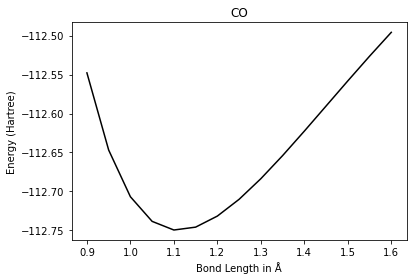

In [129]:
mol_tmpl = """C
O 1 **R**"""
rvals = [0.9, 0.95, 1.0, 1.05, 1.1, 1.15, 1.2, 1.25, 1.3, 1.35, 1.4, 1.45, 1.5, 1.55, 1.6]
molecules =[]
energies = []
for r in rvals:
    molecule = psi4.geometry(mol_tmpl.replace("**R**", str(r)))
    molecules.append(molecule)
for mol in molecules:
    energy = psi4.energy("SCF/cc-pVDZ", molecule=mol)
    energies.append(energy)
data1 = psi4.diatomic.anharmonicity(rvals, energies)    
plt.plot(rvals, energies, 'black')
plt.ylabel("Energy (Hartree)")
plt.xlabel("Bond Length in Å")
plt.title("CO")
plt.show()


In [130]:
Ene = lambda n : data1['we']*(n+1/2)
Corre = lambda n : data1['wexe']*(n+1/2)**2
for n in range(0,4):
    print("The energy for n = %d without correction is: %.2f" %(n,Ene(n)))
    print("The energy for n = %d with anharmonic correction is: %.2f \n" %(n,Ene(n)-Corre(n)))

The energy for n = 0 without correction is: 1235.42
The energy for n = 0 with anharmonic correction is: 1231.30 

The energy for n = 1 without correction is: 3706.26
The energy for n = 1 with anharmonic correction is: 3669.15 

The energy for n = 2 without correction is: 6177.10
The energy for n = 2 with anharmonic correction is: 6074.02 

The energy for n = 3 without correction is: 8647.95
The energy for n = 3 with anharmonic correction is: 8445.91 



In [131]:
for n in range(0,4):
    print("The difference between harmonic and anharmonic energy for n = %d is: %.2f" %(n,Ene(n)-(Ene(n)-Corre(n))))

The difference between harmonic and anharmonic energy for n = 0 is: 4.12
The difference between harmonic and anharmonic energy for n = 1 is: 37.11
The difference between harmonic and anharmonic energy for n = 2 is: 103.08
The difference between harmonic and anharmonic energy for n = 3 is: 202.04


In [132]:
k = sympy.symbols('k')
m1=12.011
m2=15.999
mu = (m1*m2)/(m1+m2)
system = data1['we']*100-(2*sympy.pi*299792458)**-1*sympy.sqrt(k/((mu)*psi4.constants.amu2kg))
sol = sympy.solve(system, k)
printy =[data1['we'], data1['wexe'], mu , sol[0]]
print("we is equal to %.2f cm-1" %printy[0])
print("wexe is equal to %.2f cm-1" %printy[1])
print("mu is equal to %.2f kg" %printy[2])
print("k is equal to %.2f N/m " %printy[3])

we is equal to 2470.84 cm-1
wexe is equal to 16.49 cm-1
mu is equal to 6.86 kg
k is equal to 2467.74 N/m 


Question: *Based on your results, is anharmonicity a more significant factor for HF or CO?*

Write your answer here: it is a more significant factor in HF than it is in CO

Question: *Is the force constant greater for HF or CO?  Do your results agree with the typical bond orders expected for HF and CO?*

Write your answer here: It is greater in CO, and it does agree with the expected bond order